###### Autor: Pedro Garcez (pedroogarcez@usp.br)

# 1.Introdução

<div class = 'text-justify'>
Para entender e inferir sobre características socioeconômicas da população brasileira, iniciou-se no ano de 1967 a Pesquisa Nacional por Amostra de Domicílios (PNAD) desenvolvida anualmente pelo Instituto Brasileiro de Geografia e Estatística (IBGE). Através de diferentes indicadores, o principal objetivo é analisar as informações fornecidas pela pesquisa a curto, médio e longo prazo para efetivar decisões e acompanhar o desenvolvimento do País. Dessa forma, simulando as abordagens estatísticas e descritivas necessárias para obtenção de resultados, o presente projeto visa abordar aspectos presentes na sociedade e responder perguntas como: </div>

* Qual a renda média da população brasileira por cor?
* Qual sexo possui mais anos de estudo?
* A relação entre anos de estudos e renda ocorre de maneira diretamente proporcional na sociedade?

<div class = 'text-justify'>
O projeto será desenvolvido utilizando a linguagem de programação Python para realização de estatísticas contínuas e geração de gráficos para interpretação dos resultados.
</div>

# 2. Variáveis

**UF:** Estados onde cada entrevistado mora\
**Sexo:** 0: Masculino  1: Feminino \
**Idade:** Idade do entrevistado referenciada em anos \
**Cor:** Variedade de tons de pele identificado por cada indivíduo \
**Anos de estudo:** Referenciado de 1 a 17, sendo: 1: Sem instrumentação, 2: 1 ano de estudo, 3: 2 anos de estudos, ... , 17: Tempo de estudo indeterminado \
**Renda:** Salário mensal advindo do principal trabalho para entrevistados maiores de 10 anos. \
**Altura:** Referenciada em metros

# 3. Bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

# 4. Importando e tratando dados

In [2]:
# Carregando o arquivo csv
df = pd.read_csv('dados.csv',sep=',')
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


##### 4.1 Lapidando e modificando alguns detalhes da planilha. 

In [3]:
# Adicionando colunas com variáveis qualitativas
sexo_dic = {0:'Masculino',1:'Feminino'}
df['sexo_str'] = df['Sexo'].map(sexo_dic)
# -
cor_dic = {0:'Indígena',2:'Branca',4:'Preta',6:'Amarela',8:'Parda',9:'Não declarado'}
df['cor_str'] = df['Cor'].map(cor_dic)
# -
estado_int = df['UF'].value_counts().index.tolist()
estado_str = ['SP','MG','RS','BA','RJ','PA','PR','PB','GO','CE','SC','AM','DF','MT','MA','RO','ES','MS','TO','SE','PB',
           'PI','RN','AC','AL','RR','AP']
estado_dic = dict(zip(estado_int,estado_str))
df['estado_str'] = df['UF'].map(estado_dic)

In [4]:
# Retirando o espaçamento presente na coluna Anos de Estudo
df.columns = df.columns.str.replace(' ', '') 

In [5]:
# Formatando as casas decimais das colunas Renda e Altura
pd.set_option('display.precision',2)

In [6]:
df.head()

,UF,Sexo,Idade,Cor,AnosdeEstudo,Renda,Altura,sexo_str,cor_str,estado_str
0,11,0,23,8,12,800,1.60,Masculino,Parda,RO
1,11,1,23,2,12,1150,1.74,Feminino,Branca,RO
2,11,1,35,8,15,880,1.76,Feminino,Parda,RO
3,11,0,46,2,6,3500,1.78,Masculino,Branca,RO
4,11,1,47,8,9,150,1.69,Feminino,Parda,RO


<div class = 'text-justify'>
obs: Foram adicionadas novas colunas composta por variáveis qualitativas visando facilitar a interpretação dos resultados, sem a necessidade de consultar o significado de cada número.
</div>

# 5. Análise descritiva

#### 5.1 Analisando o corportamento das variáveis

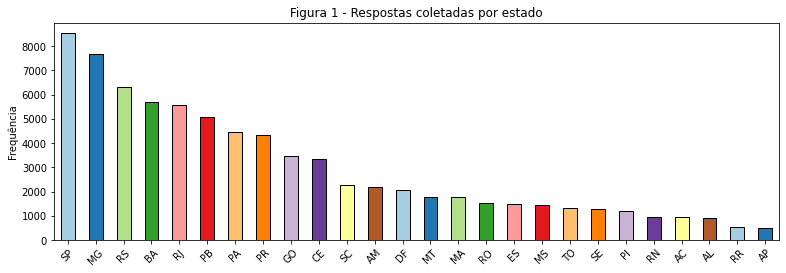

In [7]:
plt.figure(figsize=(13,4))
col_map = plt.get_cmap('Paired')
df['estado_str'].value_counts().plot(kind='bar',color=col_map.colors,edgecolor='k')
lista_freq_estados = df['UF'].value_counts().tolist()
plt.xticks(rotation=45);
plt.title('Figura 1 - Respostas coletadas por estado')
plt.ylabel('Frequência');

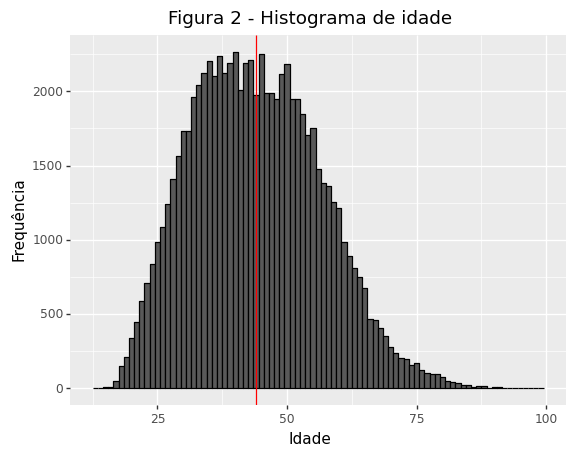

<ggplot: (147047361205)>

In [8]:
# Descrevendo a distribuição de idade da população brasileira
mean = np.mean(df['Idade'])
(ggplot(df, aes(x = "Idade")) +
 geom_histogram(binwidth = 1,color='black')+
 geom_vline(df, aes(xintercept=mean),color='red')+
labs(y='Frequência',title='Figura 2 - Histograma de idade'))

C:\Users\55129\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 137'. Pick better value with 'binwidth'.


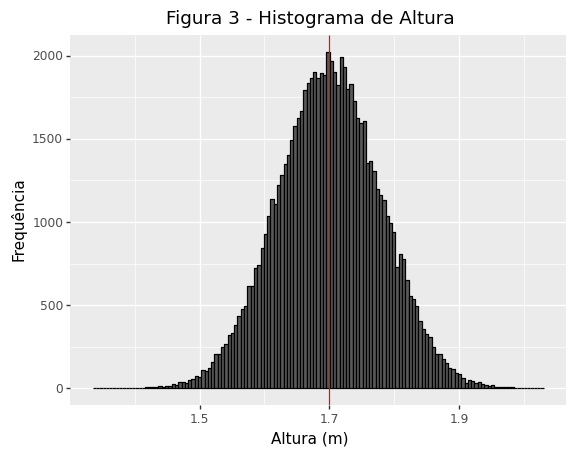

<ggplot: (147047652121)>

In [36]:
mean1 = np.mean(df['Altura'])
(ggplot(df, aes(x = "Altura")) +
 geom_histogram(color='black')+
 geom_vline(df, aes(xintercept=mean1),color='red')+
labs(y='Frequência',title='Figura 3 - Histograma de Altura',x='Altura (m)'))

#### 5.2 Relacionando as variáveis 

In [13]:
# Analisando os estados com maiores médias de anos de estudo 
df[['estado_str','AnosdeEstudo']].groupby('estado_str').agg('mean').sort_values(by='AnosdeEstudo', ascending=False).head(5)

,AnosdeEstudo
estado_str,
DF,11.91
SP,10.64
RJ,10.55
SC,10.23
RS,10.10


In [14]:
# Analisando os estados com maiores médias de renda
df[['estado_str','Renda']].groupby('estado_str').agg('mean').sort_values(by='Renda', ascending=False).head(6)

,Renda
estado_str,
DF,4241.95
SP,2638.10
RJ,2496.40
PR,2493.87
SC,2470.85
RS,2315.16


In [15]:
# Analisando os estados com menores médias de anos de estudo
df[['estado_str','AnosdeEstudo']].groupby('estado_str').agg('mean').sort_values(by='AnosdeEstudo', ascending=True).head(5)

,AnosdeEstudo
estado_str,
PI,7.01
SE,7.34
MA,7.52
AL,7.84
AC,8.40


In [16]:
# # Analisando os estados com menores médias de renda
df[['estado_str','Renda']].groupby('estado_str').agg('mean').sort_values(by='Renda', ascending=True).head(5)

,Renda
estado_str,
MA,1019.43
PI,1074.55
SE,1109.11
AL,1144.55
CE,1255.40


<div class = 'text-justify'>
Baseado nos resultados presentes nas quatro tabelas acima, vamos denominar dois grupos, para facilitar nossa análise descritiva: <br>
<b>Grupo A:</b> Grupo composto pelos <b>5 estados com MELHORES ÍNDICES</b> das variáveis "Anos de estudo" e "Renda, sendo eles: DF, SP, RJ, SC RS <br>
    <b>Grupo B:</b> Grupo composto pelos <b>5 estados com PIORES ÍNDICES</b> das variáveis "Anos de estudo" e "Renda", sendo eles: PI, SE, MA, AL, AC
    </b>

In [17]:
# Lista composta por estados com melhores índices
anoestudo_melhores = [11.91,10.64,10.55,10.23,10.10]
renda_melhores = [4241.95,2638.1,2496.4,2493.87,2315.16]
# Lista composta por estados com piores índices
anoestudo_piores = [8.4,7.84,7.52,7.34,7.01]
renda_piores = [1255.4,1144.55,1109.11,1074.55,1019.43]

In [18]:
# Criando uma função que calcula a regressão linear de acordo com as listas informadas
def regressao_linear(lista1,lista2):
  k = []
  reg = np.polyfit(lista1,lista2,1)
  for i in lista1:
    c = i*reg[0]+reg[1]
    k.append(c)
  return k

# Chamando a função para calcular a regressão linear para ambos os grupos
reg_melhores = regressao_linear(anoestudo_melhores,renda_melhores)
reg_piores = regressao_linear(anoestudo_piores,renda_piores)

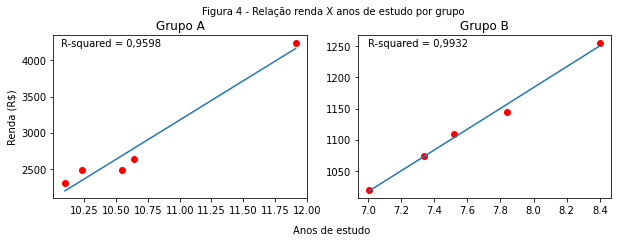

In [19]:
# Plotando os gráficos e regressões dos respectivos grupos
fig,axs = plt.subplots(figsize=(10,3),nrows=1,ncols=2)
axs[0].plot(anoestudo_melhores,renda_melhores,'o',color='r')
axs[0].plot(anoestudo_melhores,reg_melhores,'-')
axs[0].set_title('Grupo A')
axs[0].set_ylabel('Renda (R$)')
axs[1].plot(anoestudo_piores,renda_piores,'o',color='r')
axs[1].plot(anoestudo_piores,reg_piores,'-')
axs[1].set_title('Grupo B')
plt.text(s='Anos de estudo',x=6.55,y=950)
plt.text(s='R-squared = 0,9598',x=5.15,y=1250)
plt.text(s='R-squared = 0,9932',x=7,y=1250)
plt.text(s='Figura 4 - Relação renda X anos de estudo por grupo',x=6,y=1300)
plt.show()

<div class = 'text-justify'>
Em relação aos anos de estudos, é possível observar as menores médias presentes na região Nordeste, em ressalva do Acre. Esses resultados são consequências da alta taxa de analfabetismo gerada pelo alto índice de evasão escolar presentes na região. Em contrapartida, os maiores índices estão distribuídos desde estados da região central até a parte Sul do País. Por último, comparando cada grupo, pode ser identificado uma relação direta entre as variáveis renda e anos de estudo: enquanto a população de estados com maior média salarial possui maior índice de instrução, habitantes de regiões com menor salário possuem menos anos de estudo.
    </div>

#### 5.2.1 Comparando os anos de estudos entre Homens e Mulheres

In [20]:
df[['sexo_str','AnosdeEstudo']].groupby('sexo_str').agg(['mean','median','var','std'])

AnosdeEstudo                    
                  mean median    var   std
sexo_str                                  
Feminino         10.26   12.0  19.69  4.44
Masculino         9.12    9.0  20.62  4.54

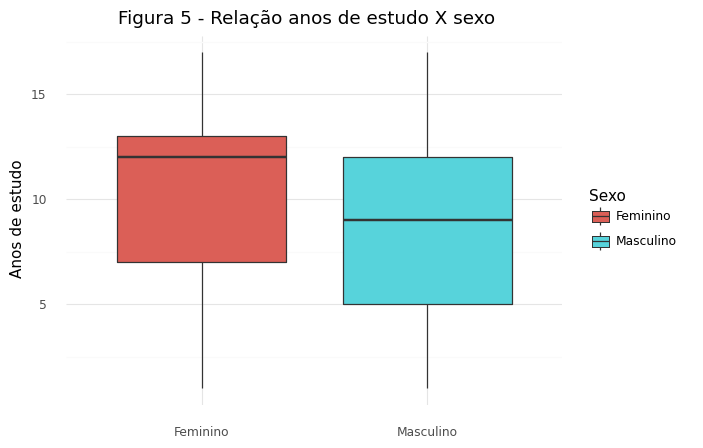

<ggplot: (147048311257)>

In [22]:
(ggplot(df, aes(x = "sexo_str",
                  y = "AnosdeEstudo",
                  fill = "sexo_str")) +
 theme_minimal() +
 labs(x='',fill='Sexo',y='Anos de estudo',title='Figura 5 - Relação anos de estudo X sexo') +
 geom_boxplot())

<div class = text-justify>
Analisando os boxplots, notam-se as semelhantes variabilidades entre os dois grupos. Além disso, observa-se que as mulheres possuem maior empenho nos estudos quando comparadas aos homens, devido os resultados de quartis superiores. 
 </div>

#### 5.2.2 Analisando a distribuição de renda 

In [23]:
# Agrupando as colunas Renda e Sexo para comparar o salário mensal entre Homens e Mulheres.
df[['sexo_str','Renda']].groupby('sexo_str').agg(['mean','std'])

Renda         
              mean      std
sexo_str                   
Feminino   1566.85  2570.66
Masculino  2192.44  3590.31

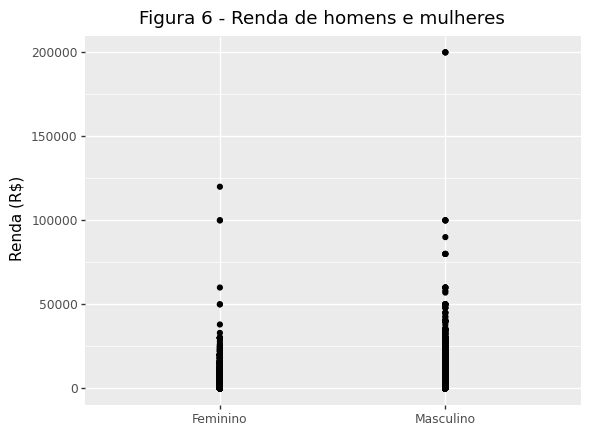

<ggplot: (147047659397)>

In [25]:
(ggplot(df, aes(x = "sexo_str", y = "Renda")) +
  geom_point()+
 labs(x='',y='Renda (R$)',title='Figura 6 - Renda de homens e mulheres '))

In [26]:
# Analisando as medidas de posição e dispersão referentes a variável Renda
media = np.mean(df['Renda'])
mediana = np.median(df['Renda'])
variancia = np.var(df['Renda'])
desv_pad = np.std(df['Renda'])

Medidas      | Renda 
------- | -----
Média   | 2000,38
Mediana | 1200,00
Variância | 11044762,26
Desvio Padrão | 3323,36


<div class = 'text-justify'>
A partir do gráfico acima, é possível observar a presença de salários superiores para entrevistados do sexo Masculino, com valores discrepantes também acima dos informados por pessoas do sexo Feminino. Além disso, nota-se a dispersão de renda para ambos os gêneros como evidente na tabela, possibilitando concluir sobre casos de desigualdade sociais e heterogeneidade de salários presentes na sociedade.

</div>    

In [27]:
# # Agrupando as colunas Renda e Cor de pele para comparar o salário mensal entre cada uma das 5 cores presentes na tabela.
df[['cor_str','Renda']].groupby('cor_str').agg(['min','mean','max'])

Renda                 
           min     mean     max
cor_str                        
Amarela      0  4182.92   50000
Branca       0  2679.02  200000
Indígena     0  1472.89  120000
Parda        0  1513.60  100000
Preta        0  1442.29   50000

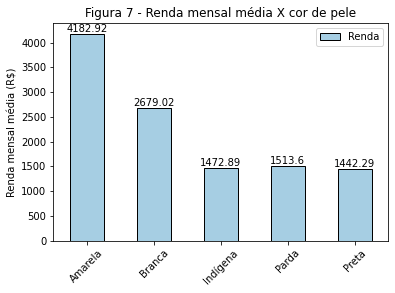

In [37]:
col_map = plt.get_cmap('Paired')
df[['cor_str','Renda']].groupby('cor_str').agg('mean').plot(kind='bar',color=col_map.colors,edgecolor='k')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Renda mensal média (R$)')
plt.title('Figura 7 - Renda mensal média X cor de pele');
media_renda_cor = [4182.92,2679.02,1472.89,1513.6,1442.29]
# Criando um loop que posicione os textos de média sobre cada barra
for i in range(len(media_renda_cor)):
    plt.text(i,media_renda_cor[i],media_renda_cor[i],ha='center',va='bottom')

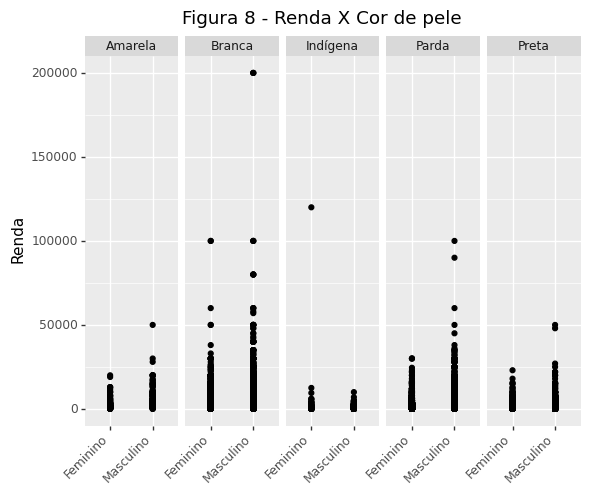

<ggplot: (147060307559)>

In [33]:
(ggplot(df) +
  geom_point(aes(x = "sexo_str", y = "Renda"))+
  facet_grid("~cor_str") +
  theme(axis_text_x  = element_text(angle = 45, hjust = 1))+
  labs(x = '',title='Figura 8 - Renda X Cor de pele ')) 

Em relação à renda de grupos com diferentes cores de pele especificados, a ordem de salário médio se faz por: Amarela, Branca, Parda, Indígena e Preta.

# 6. Conclusões

<div class = 'text-justify'>
No presente projeto, foram abordados diferentes parâmetros presentes no Brasil através da análise de dados descritiva realizada em Python e sustentada por métodos estatísticos. Em meio as variáveis observadas, foi possível identificar através dos histogramas as distribuições de frequências relacionadas a idade e a altura média da amostra selecionada. Além disso, chama atenção a infeliz persistência de paradigmas no País, como o fato da menor média salarial mensal ser proveniente de pessoas declaradas Pretas, enquanto Asiáticos e Brancos concentram maiores valores (Figura 6). Outro fator importante a ser ressaltado é a desigualdade salarial entre gêneros, em que homens possuem médias e pretensões de renda superiores às mulheres (Figura 4), mesmo apresentando experiências e anos de estudos inferiores (Figura 3). Por último, observou-se que a desigualdade entre estados pode ser descrita entre dois grupos que apresentam valores opostos referentes aos índices de escolaridade e salários (Figura 2). <br>
Diante desse cenário, além de concluir sobre a desigualdade presente em diferentes classes e grupos que compõem a sociedade brasileira, é possível inferir sobre a necessidade de medidas que visam diminuir os níveis de heterogeneidades. Assim, será possível oferecer condições dignas para maior parte da população brasileira e exibir dados que evidenciam boas condições, independente do tamanho da amostra selecionada.
    </div>
    

# 7. Agradecimentos

<div class = 'text-justify'>
A professora Bruna Garbes, que durante as aulas esteve disponível para me auxiliar e compartilhar seus conhecimentos relacionados ao tema de estudo. <br />
 Aos orientadores da matéria, responsáveis por sanar minhas dúvidas e capacitar a consolidação de minhas ideias no presente trabalho.
</div>

# 8. Referências
#### [1. Kaggle (Data download): Statistical Analysis | Descriptive Statistics-BR](https://www.kaggle.com/code/upadorprofzs/statistical-analysis-descriptive-statistics-br/notebook) 
#### [2. GGplot2: Modify axis, legend, and plot labels](https://ggplot2.tidyverse.org/reference/labs.html)
#### [3. Youtube: How to add value labels on a matplotlib bar chart (above each bar) in Python](https://www.youtube.com/watch?v=O_5kf_Kb684)
#### [4. Youtube: Plotting and Linear Regression with Python Numpy and Matplotlib](https://www.youtube.com/watch?v=FY7N4iwWwow)